# Task 4.9 Part 2 Visualizations

## Contents

## 1. Copy everything from 4.9 here
## 2. Histogram of the “order_hour_of_day” column
## 3. Distribution of orders among customers in terms of loyalty: bar chart from the “loyalty_flag” column
## 4. Difference in expenditure (the “prices” column) depending on the hour of the day
## 5. Exploratory analysis of customer demographics to inform the targeted marketing campaigns
## 6. Connection between age and spending power (income) by creating a scatterplot 

In [8]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing new data set
path = r'/Users/sophie/Desktop/CareerFoundry /09 2023 Phython'
path

'/Users/sophie/Desktop/CareerFoundry /09 2023 Phython'

In [3]:
df_merge_instacard_cust = pd.read_pickle(os.path.join(path, 'Data', 'prepared data ', 'df_merge_instacard_cust.pkl'))
df_merge_instacard_cust.shape

(32404859, 35)

In [5]:
df_merge_instacard_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 1. Copy everything from 4.9

<Axes: xlabel='orders_day_of_week'>

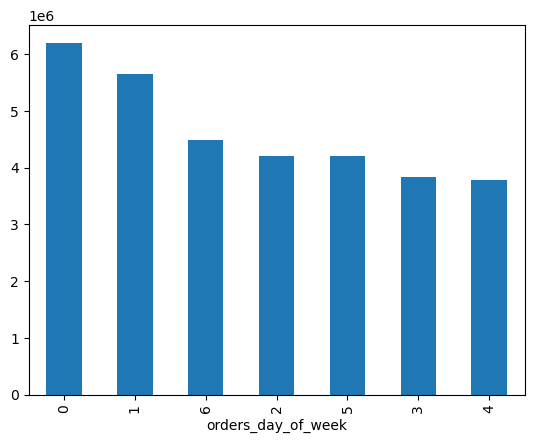

In [7]:
# Create a bar chart
# Bar charts make it easy to determine how the observations in the data set are distributed among the categories of a variable

df_merge_instacard_cust['orders_day_of_week'].value_counts().plot.bar()

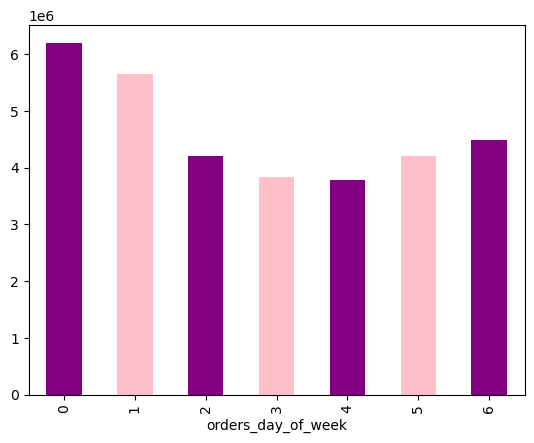

In [10]:
# Sorting differently
# Adding colors
bar = df_merge_instacard_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'pink'])

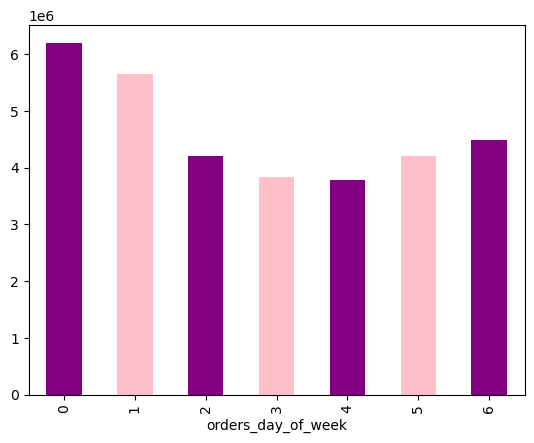

In [11]:
# Access through
bar.figure

In [12]:
# Export it outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_merged_orders_dow.png'))

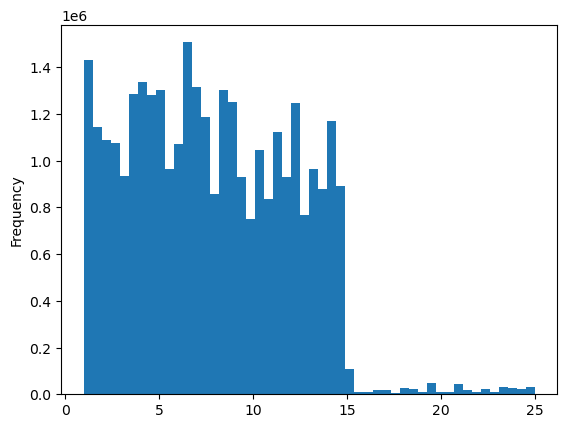

In [11]:
# Creating histograms
# Histograms are used to show the density of a continuous variable
# Distribution of observations per their occurrence in a data set

hist = df_merge_instacard_cust['prices'].plot.hist(bins = 50)

In [12]:
# Exporting
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_merged_prices.png'))

Axes(0.125,0.11;0.775x0.77)


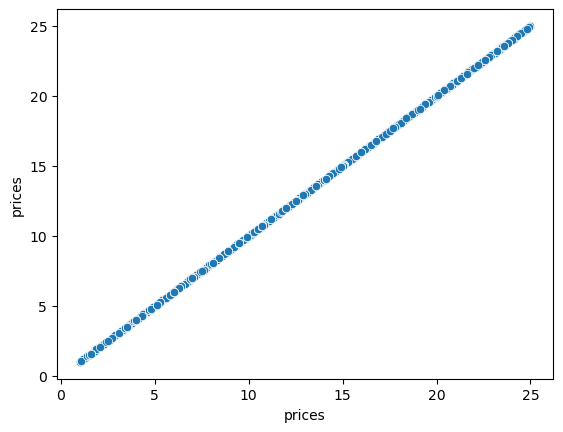

In [18]:
# Scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_merge_instacard_cust)
print(scatterplot)

In [19]:
# Exporting
scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_prices.png'))

In [23]:
# For a line chart on prices x day of the week, we need a sample, otherwise we would run into RAM/CPU issues

# Creates a reproducible pattern of random floating numbers between 0-1:
# Set the seed for the random number generator.
np.random.seed(5)

# Compares randomly created uniform numbers to 0.7 to create 70/30 subsamples:
# Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).
dev = np.random.rand(len(df_merge_instacard_cust)) <= 0.7

In [24]:
# Store 70% in the big data frame, dev = True
big = df_merge_instacard_cust[dev]

# Store 30% in the big data frame, dev = False
small = df_merge_instacard_cust[~dev]

In [25]:
# Check via sums
len(df_merge_instacard_cust)

32404859

In [26]:
len(big) + len(small)

32404859

In [27]:
# To speed up process, reduce sample to necessary columns
df_2 = small[['orders_day_of_week','prices']]
df_2

,orders_day_of_week,prices
1,3,9.0
3,4,9.0
6,1,9.0
11,2,4.4
14,4,4.4
...,...,...
32404845,0,10.7
32404846,4,10.7
32404847,3,10.7
32404853,6,10.7


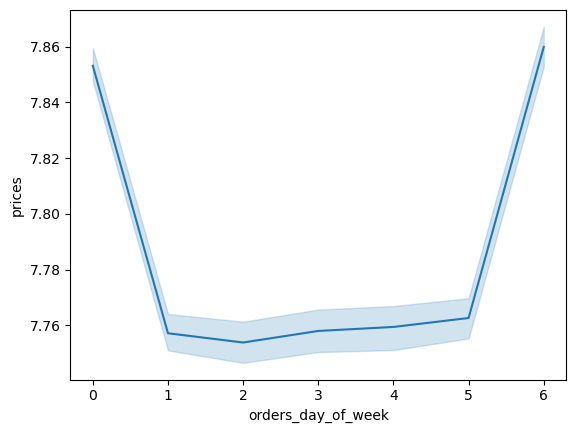

In [28]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [30]:
# Export
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_orders_day_of_week_prices.png'))

## 2. Histogram of the “order_hour_of_day” column

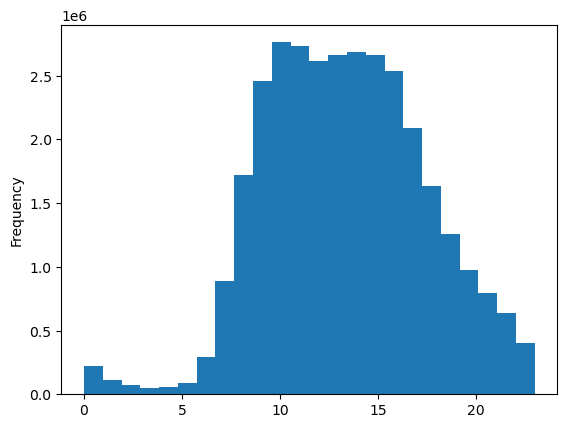

In [37]:
hist_hour = df_merge_instacard_cust['order_hour_of_day'].plot.hist(bins = 24)

#### Most orders happen between morning (8 AM) to afternoon (5 pm).

In [38]:
# Export
hist_hour.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_order_hour_day.png'))

## 3. Distribution of orders among customers in terms of loyalty: bar chart from the “loyalty_flag” column

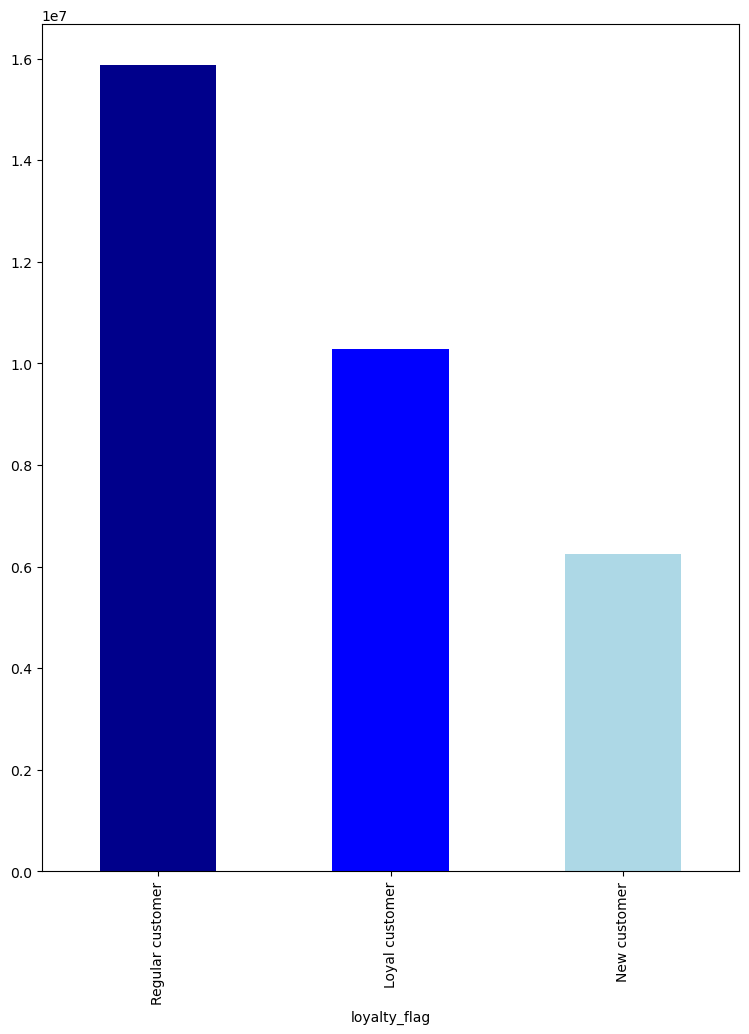

In [6]:
bar_loyalty = df_merge_instacard_cust['loyalty_flag'].value_counts().plot.bar(color = ['darkblue', 'blue', 'lightblue'], figsize=(9, 11))

In [10]:
# Export
bar_loyalty = bar_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty.png'))

#### Most customers are regular customers.

## 4. Difference in expenditure (the “prices” column) depending on the hour of the day?

In [47]:
df_3 = small[['order_hour_of_day','prices']]
df_3

,order_hour_of_day,prices
1,7,9.0
3,7,9.0
6,9,9.0
11,8,4.4
14,7,4.4
...,...,...
32404845,8,10.7
32404846,17,10.7
32404847,18,10.7
32404853,16,10.7


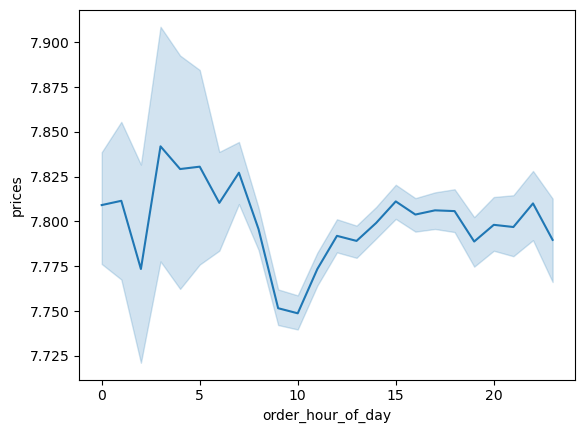

In [48]:
line_hour_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

#### At night and early mornings, people spend more money when ordering (impulsive shopping?). Around 10 AM, people spend least money. In the afternoon and evening, expenditures are relatively stable. 

In [50]:
# Export
line_hour_prices.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_hour_prices.png'))

## 5. Exploratory analysis of customer demographics to inform the targeted marketing campaigns

#### Connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [51]:
df_4 = small[['age','n_dependants']]
df_4

,age,n_dependants
1,31,3
3,31,3
6,31,3
11,31,3
14,31,3
...,...,...
32404845,25,0
32404846,25,0
32404847,25,0
32404853,25,0


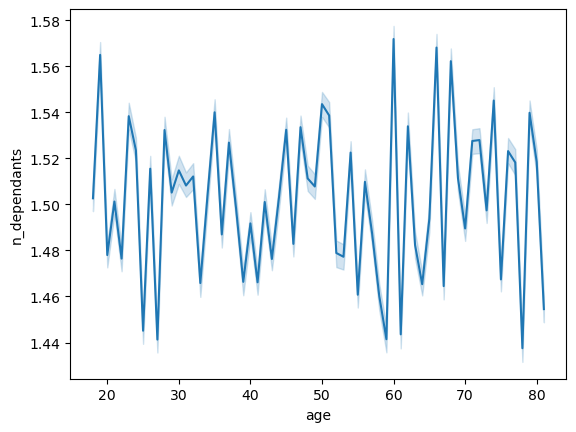

In [54]:
line_age_fam_sit = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants')

#### There seems to be not clear trend regarding age and family situation. Between 20 and 30 and at very high ages, people seem to have less dependants (more single households). Generelly speaking, the number of dependants does not differ that much between ages.

In [57]:
# Export
line_age_fam_sit.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_age_fam_sit.png'))

## 6. Connection between age and spending power (income) by creating a scatterplot 

Axes(0.125,0.11;0.775x0.77)


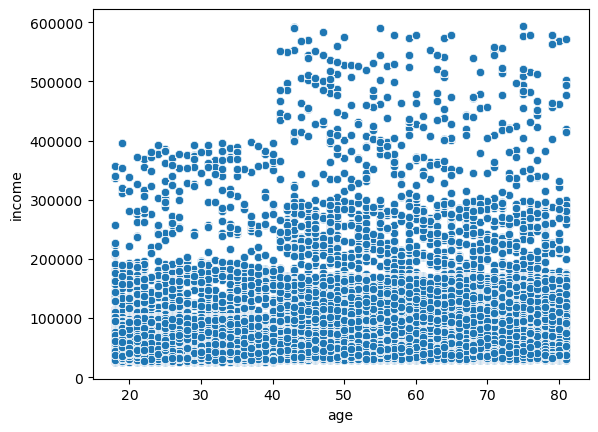

In [55]:
# Scatterplot

scatterplot_age_spendpower = sns.scatterplot(x = 'age', y = 'income',data = df_merge_instacard_cust)
print(scatterplot_age_spendpower)

#### There is no clear trend, but from 40 onwards, there are substantially more people with very high incomes up to 600k. Below, the max is around 400k.  

In [58]:
# Export
scatterplot_age_spendpower.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_age_spendpower.png'))